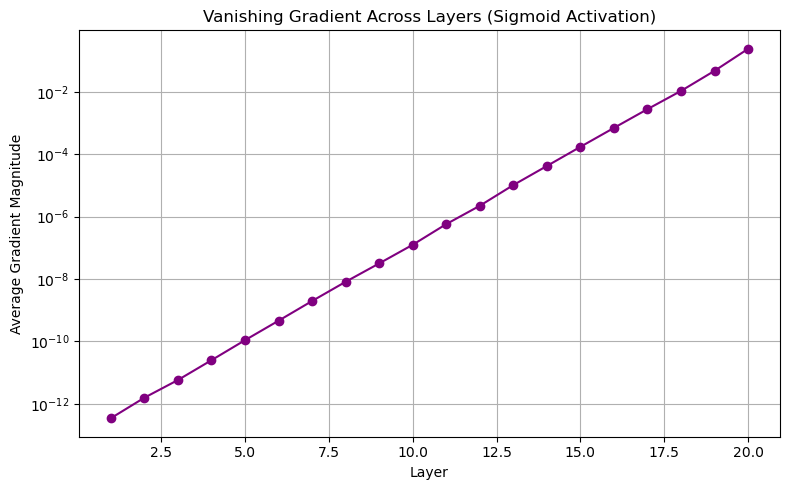

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Simulation settings
np.random.seed(42)
input_data = np.random.randn(1, 100)  # single sample, 100 features
num_layers = 20
layer_sizes = [100] * num_layers

# Initialize weights with small random values
weights = [np.random.randn(layer_sizes[i], layer_sizes[i]) * 0.1 for i in range(num_layers)]

# Forward pass and store pre-activation values for backprop
activations = [input_data]
zs = []

for w in weights:
    z = activations[-1] @ w
    zs.append(z)
    activations.append(sigmoid(z))

# Backward pass: simulate backpropagation of a gradient from the last layer
grad = np.ones_like(activations[-1])  # initial dummy gradient
gradient_magnitudes = []

for i in reversed(range(num_layers)):
    dz = sigmoid_derivative(zs[i])
    grad = grad * dz  # chain rule
    gradient_magnitudes.append(np.mean(np.abs(grad)))
    grad = grad @ weights[i].T  # propagate gradient back

gradient_magnitudes.reverse()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_layers+1), gradient_magnitudes, marker='o', linestyle='-', color='purple')
plt.xlabel("Layer")
plt.ylabel("Average Gradient Magnitude")
plt.title("Vanishing Gradient Across Layers (Sigmoid Activation)")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()
